# Uncovering Bitcoin Price Cycles from 2010-2024
by @mufiiin

## A. Prepare Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
!git clone https://github.com/fadhiljr7/datascience000.git

Cloning into 'datascience000'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 20 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 108.64 KiB | 1.97 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
df = pd.read_csv("/content/datascience000/BTC.csv")

## B. Exploratory Data Analysis

In [ ]:
df.head()

,ticker,date,open,high,low,close
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5174 entries, 0 to 5173
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  5174 non-null   object 
 1   date    5174 non-null   object 
 2   open    5174 non-null   float64
 3   high    5174 non-null   float64
 4   low     5174 non-null   float64
 5   close   5174 non-null   float64
dtypes: float64(4), object(2)
memory usage: 242.7+ KB


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df_2011 = df[df['date'].dt.year == 2011]
df_2012 = df[df['date'].dt.year == 2012]
df_2013 = df[df['date'].dt.year == 2013]
df_2014 = df[df['date'].dt.year == 2014]
df_2015 = df[df['date'].dt.year == 2015]
df_2016 = df[df['date'].dt.year == 2016]
df_2017 = df[df['date'].dt.year == 2017]
df_2018 = df[df['date'].dt.year == 2018]
df_2019 = df[df['date'].dt.year == 2019]
df_2020 = df[df['date'].dt.year == 2020]
df_2021 = df[df['date'].dt.year == 2021]
df_2022 = df[df['date'].dt.year == 2022]
df_2023 = df[df['date'].dt.year == 2023]
df_2024 = df[df['date'].dt.year == 2024]

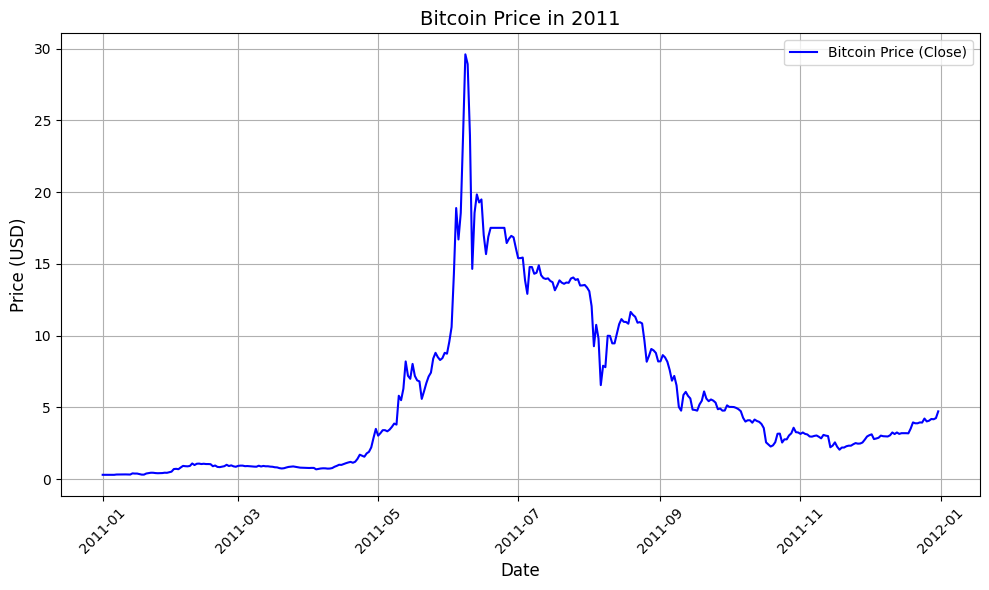

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_2011['date'], df_2011['close'], label='Bitcoin Price (Close)', color='b')
plt.title('Bitcoin Price in 2011', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

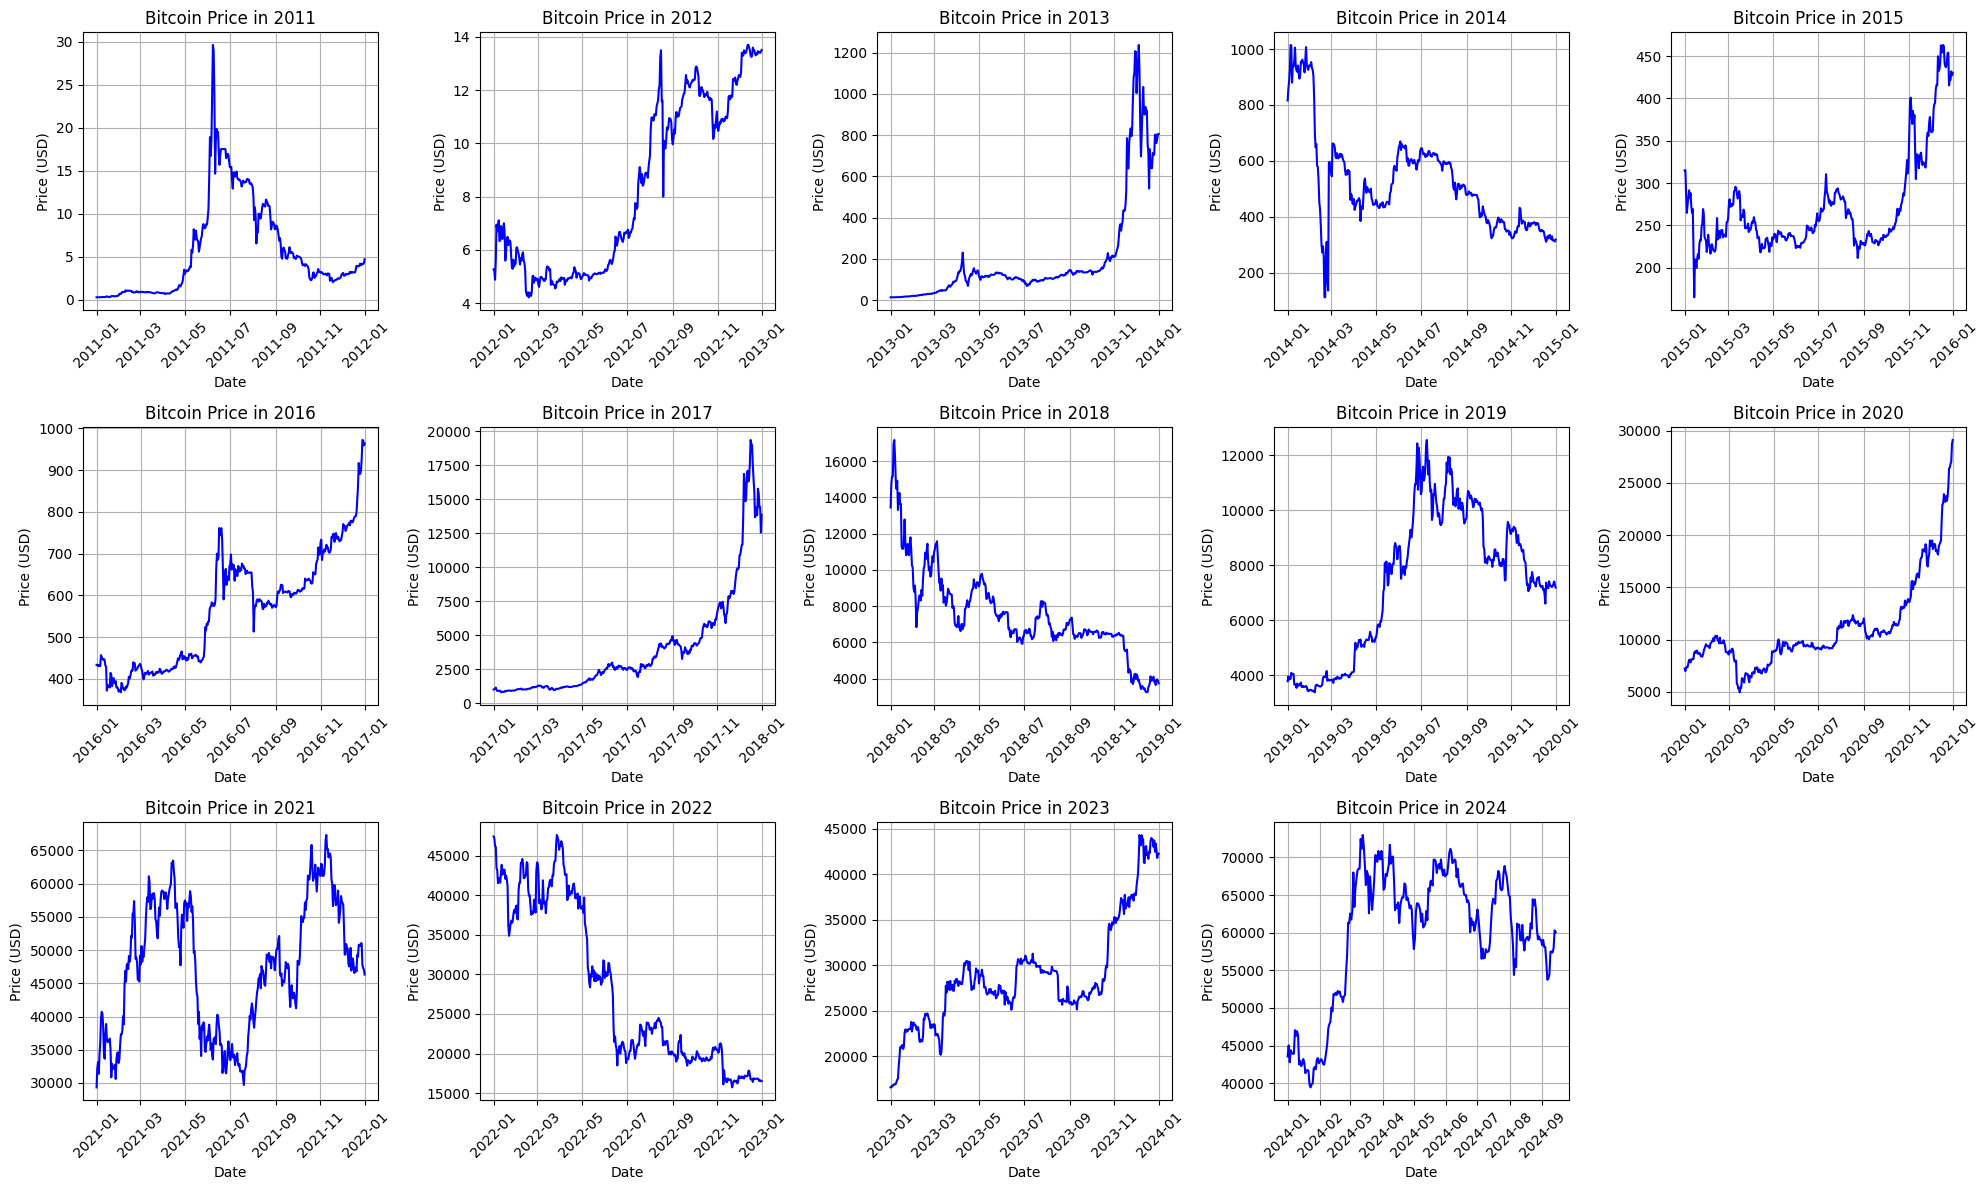

In [ ]:
dataframes = [df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024]
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))
axes = axes.flatten()

for i, (df, year) in enumerate(zip(dataframes, years)):
    axes[i].plot(df['date'], df['close'], color='b')
    axes[i].set_title(f'Bitcoin Price in {year}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price (USD)')
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

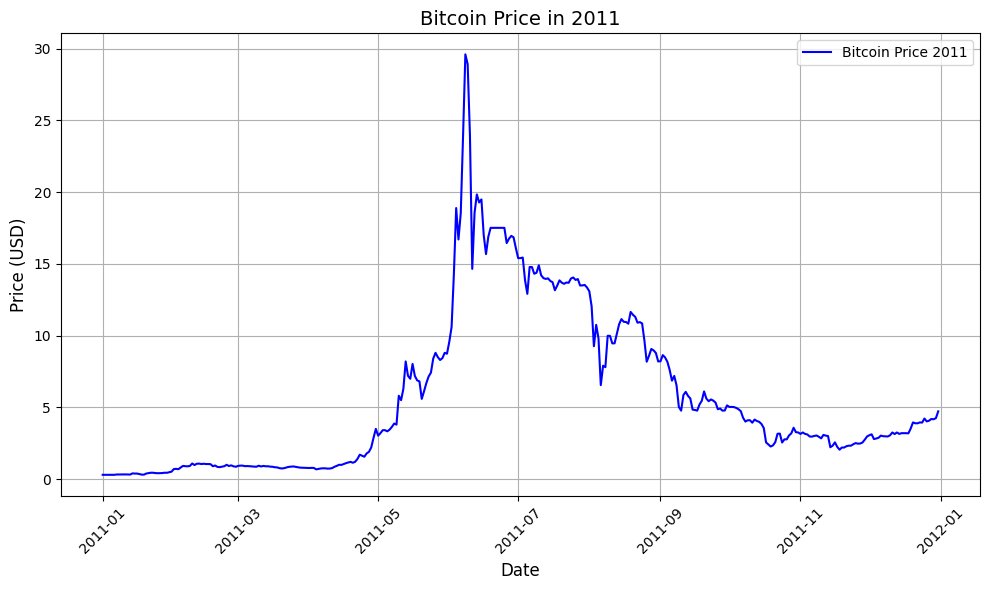

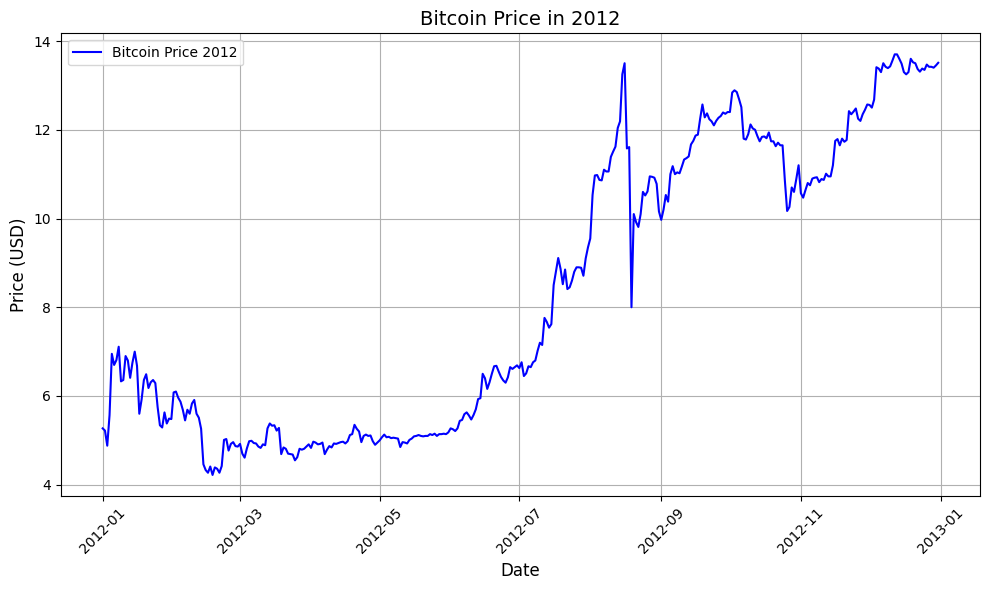

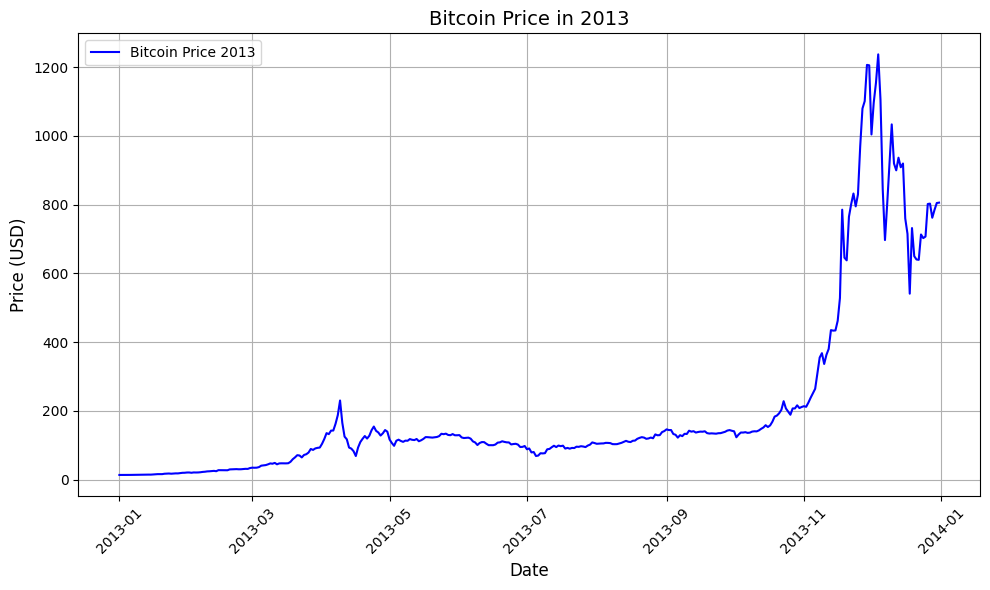

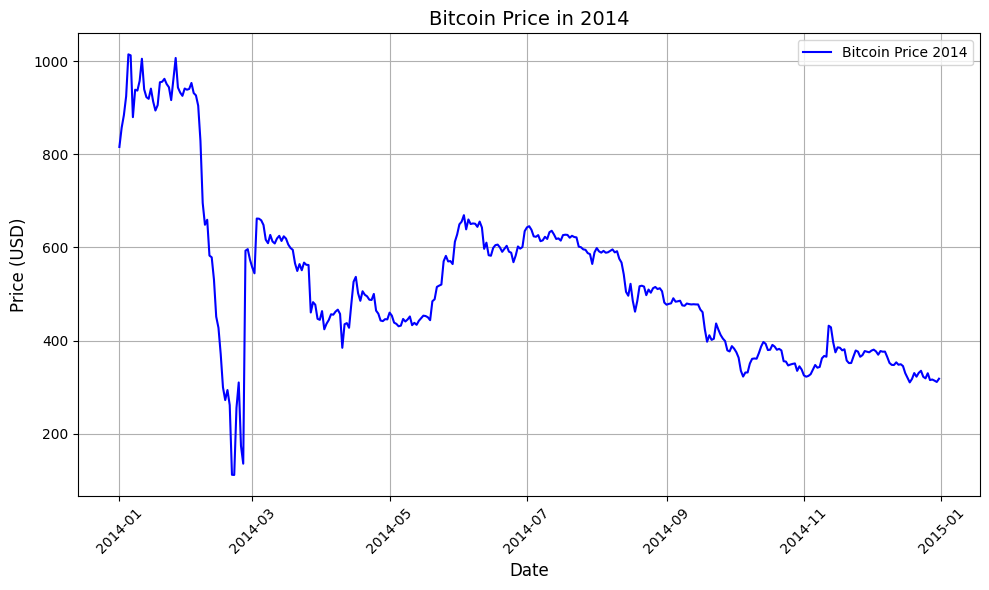

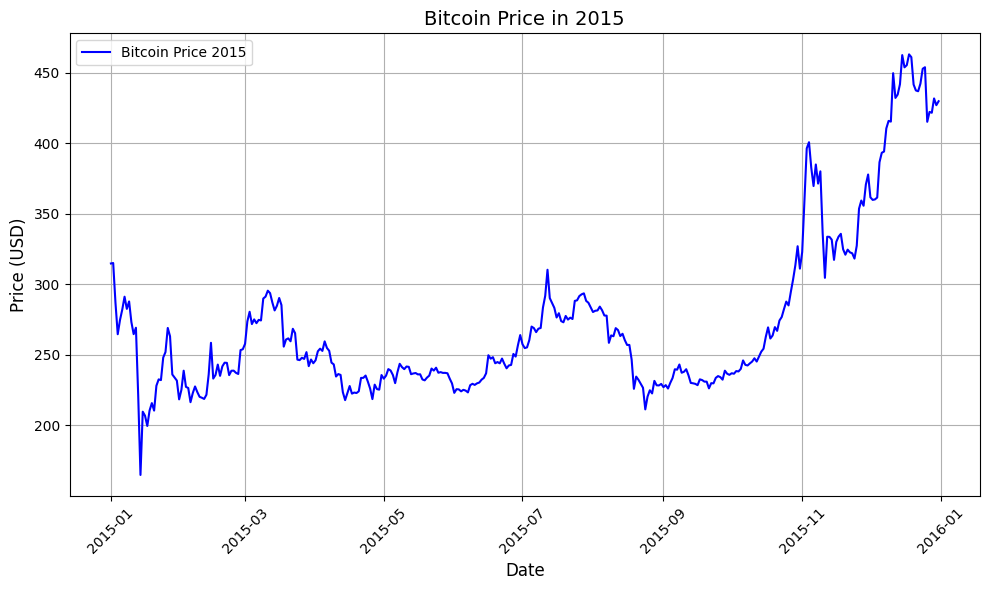

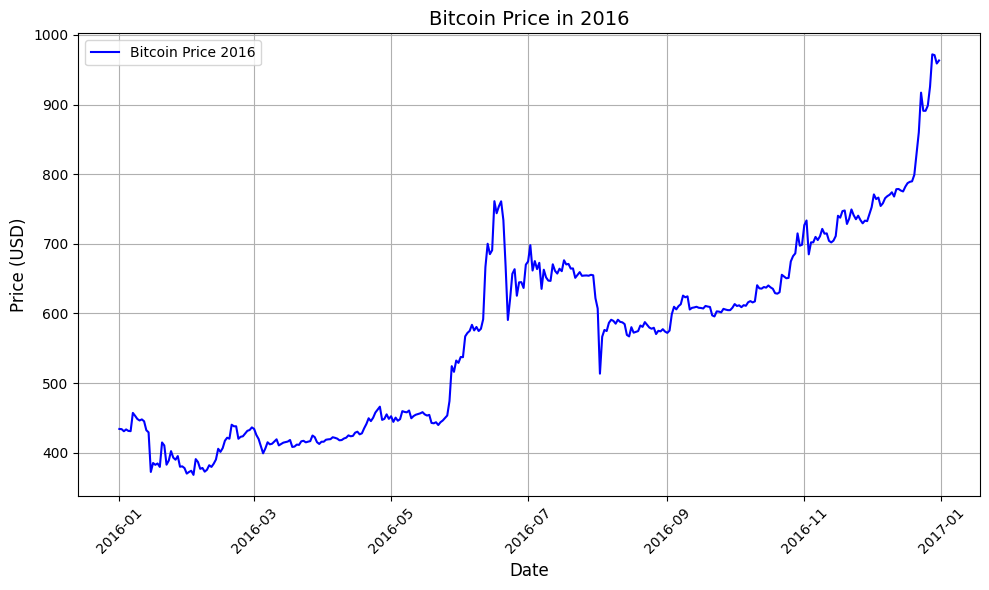

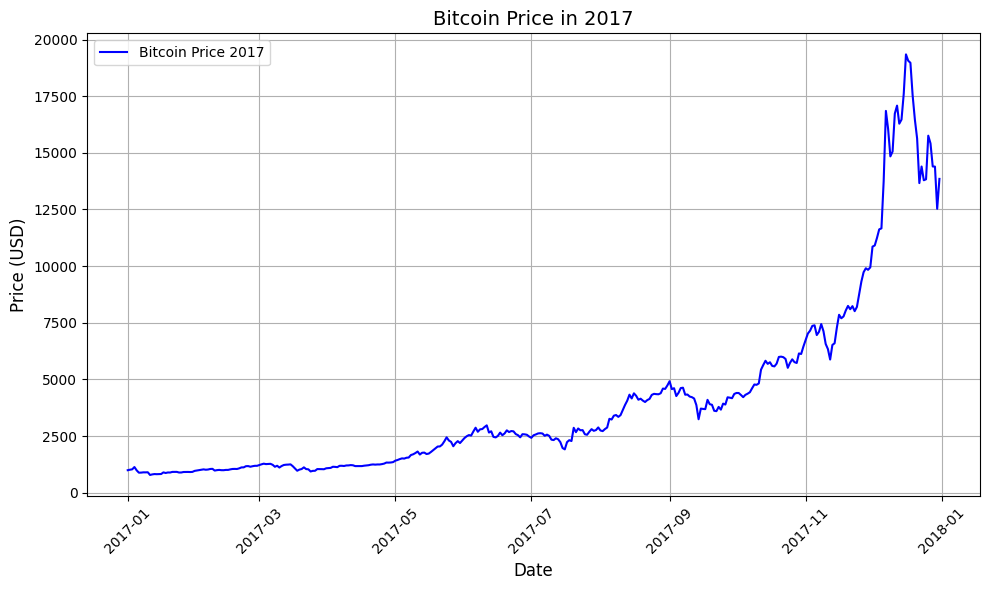

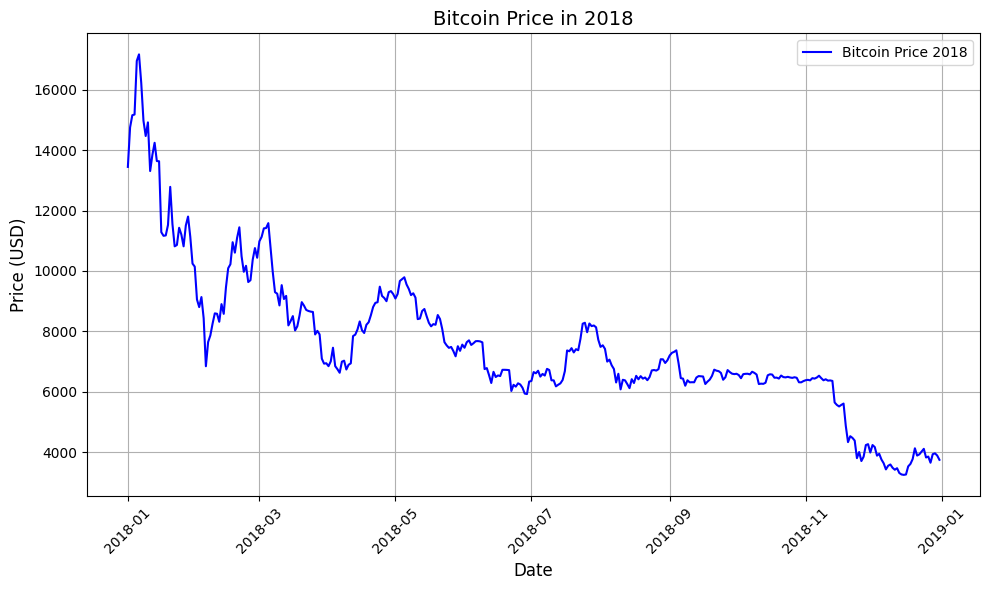

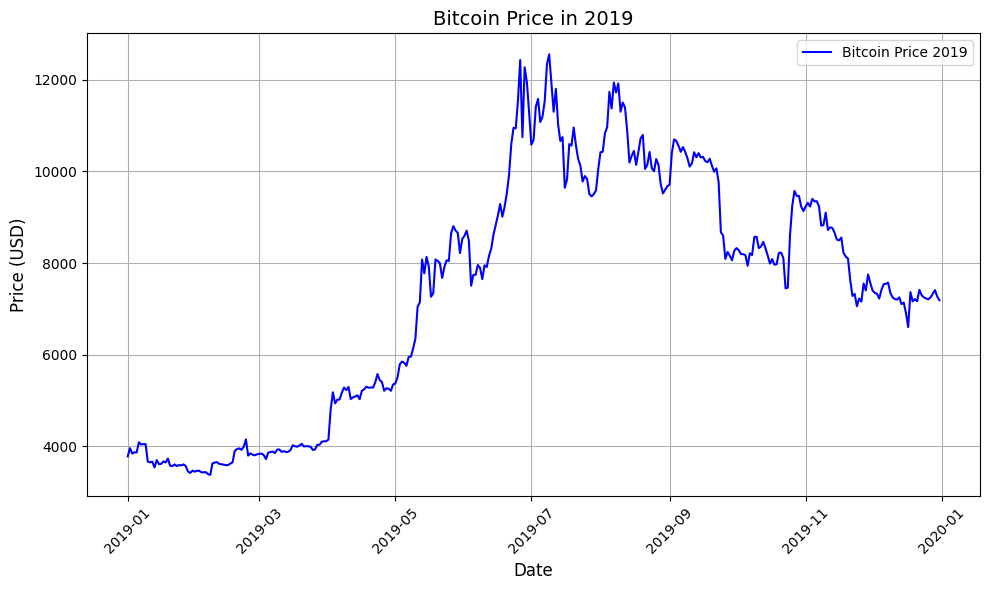

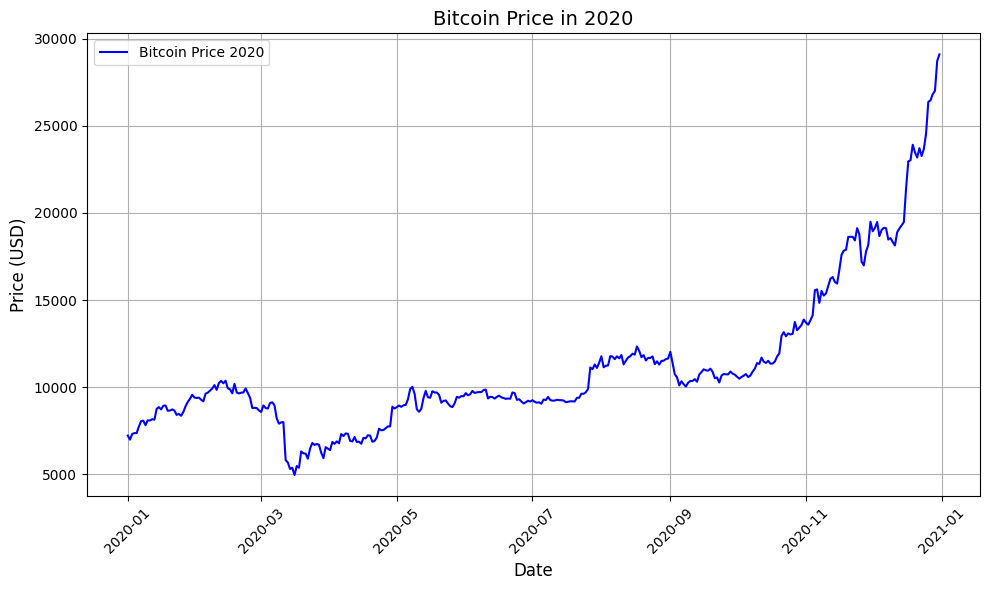

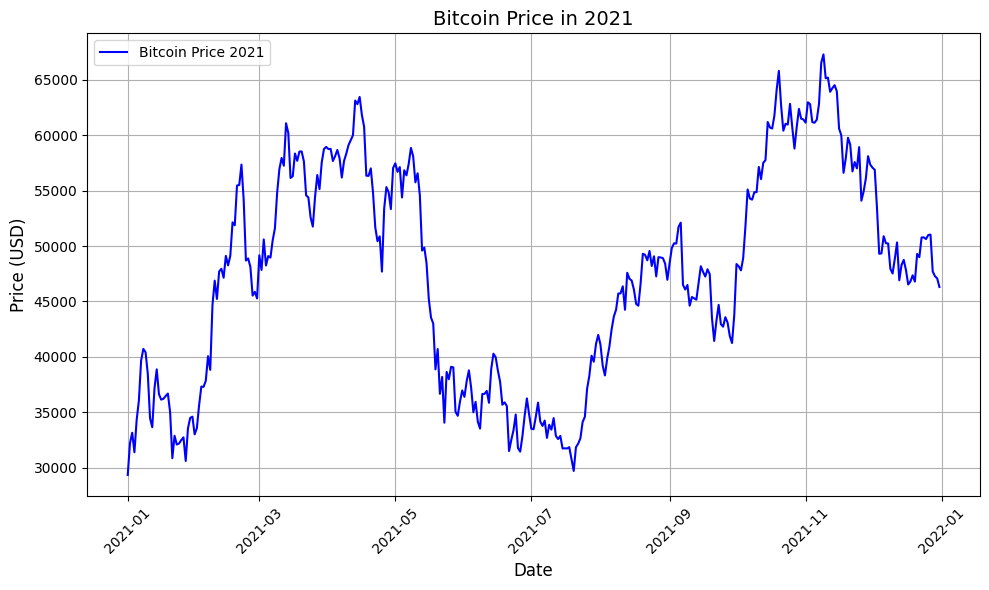

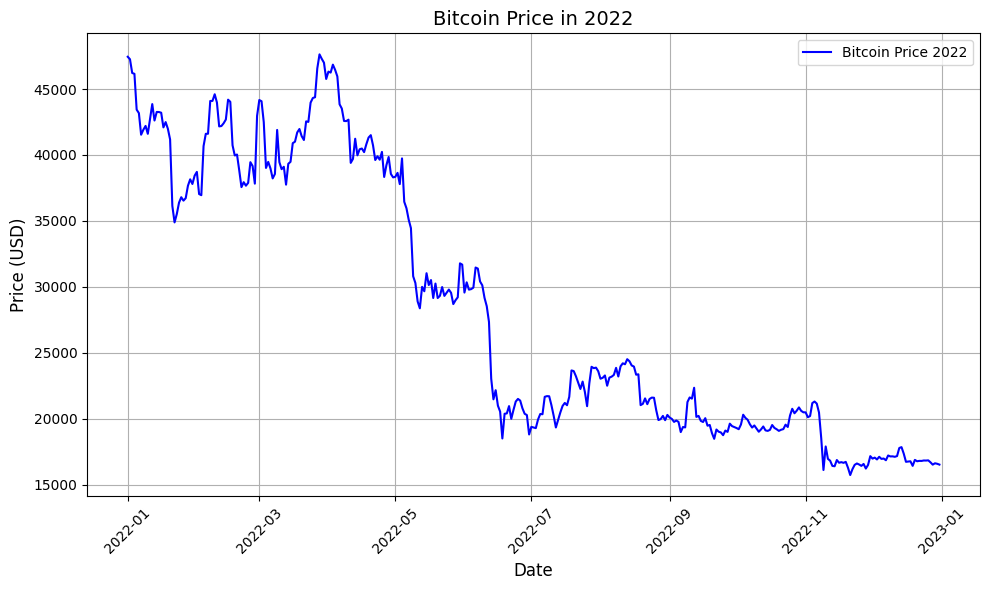

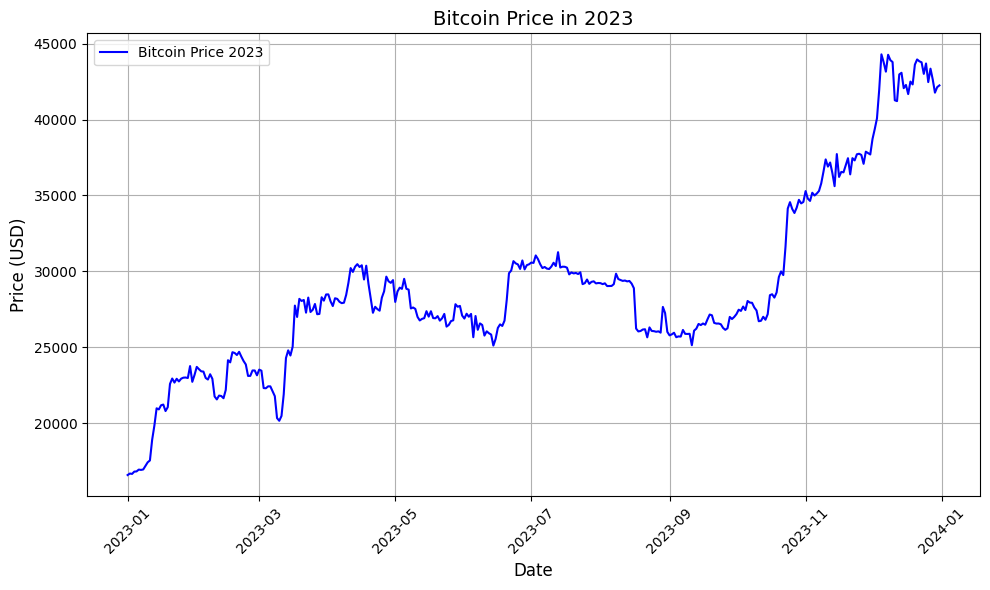

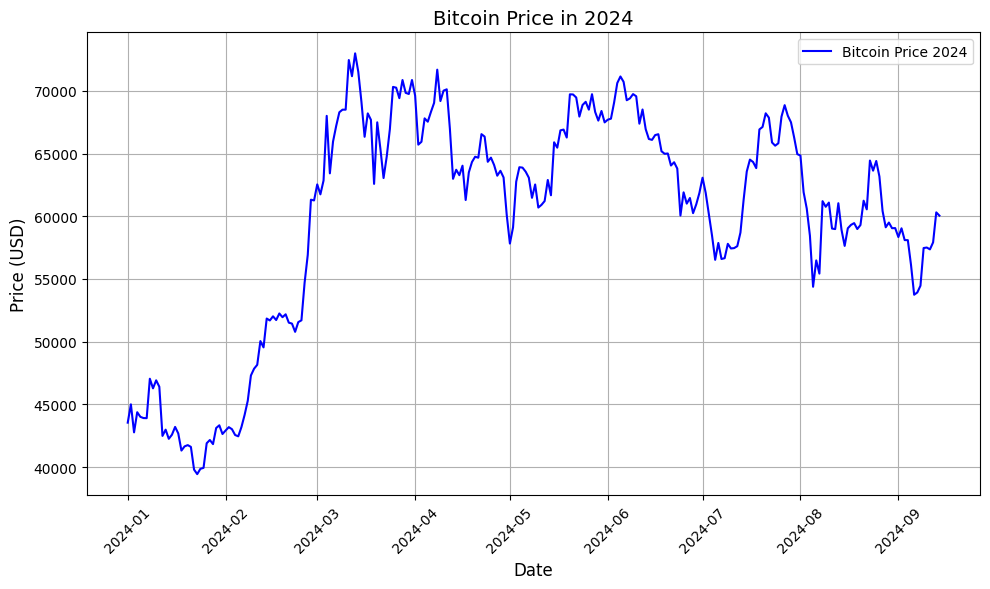

In [ ]:
for df, year in zip(dataframes, years):
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df['close'], label=f'Bitcoin Price {year}', color='b')
    plt.title(f'Bitcoin Price in {year}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## C. Machine Learning Model

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [ ]:
df1 = df[['close']]

In [ ]:
df1['shifted'] = df1['close'].shift(-1)
df1.dropna(inplace=True)

<ipython-input-6-1834614c119d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['shifted'] = df1['close'].shift(-1)
<ipython-input-6-1834614c119d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [ ]:
X = df1[['close']]
y = df1['shifted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
def predict_price(date_input):
    user_date = pd.to_datetime(date_input)

    if user_date in df.index:
        return df.loc[user_date, 'close']

    last_value = X.iloc[-1].values.reshape(-1, 1)
    return model.predict(last_value)[0]

In [ ]:
test_date = '2025-11-01'
predicted_price = predict_price(test_date)
predicted_price

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


57958.11900000005